In [1]:
import pandas as pd
import os
import numpy as np
import scipy.signal
from os import listdir

In [78]:
path = "D:/text/text/"
all = pd.DataFrame(columns=['freq', 'width', 'quality', 'diagn'], index=listdir(path))
abnorm_width = dict()
for f_name in listdir(path)[0:1640]:
    if f_name[9:] == 'txt':
        pd_file = pd.read_csv(os.path.join(path, f_name), sep=',')
        v = pd_file['ECG II-Ref']
        b, a = scipy.signal.butter(4, 0.07, btype='Low', analog=False)
        filtered = scipy.signal.filtfilt(b, a, v)
        peaks, properties = scipy.signal.find_peaks(filtered[0:1500], distance=300, prominence=0.0002, width=1)
        if len(peaks) > 1:
            freq = np.mean(np.diff(np.arange(0,3,0.002)[peaks])[0]) * 60 #частота сердечных сокращений
            width = properties["right_ips"][0] - properties["left_ips"][0]  
            all.loc[f_name, 'freq'] = freq
            all.loc[f_name, 'width'] = width
            if freq < 59:
                all.loc[f_name, 'diagn'] = 'brad'
            if freq > 100:
                all.loc[f_name, 'diagn'] = 'tach'
            if width > 50:
                abnorm_width[f_name] = width #ширина комплекса QRS
        else:
            freq = 0
        if freq > 30 and freq < 130 and width < 50:
            all.loc[f_name, 'quality'] = 'pass'
        else:
            all.loc[f_name, 'quality'] = 'unpass'
all.fillna(value=0)
print(len(abnorm_width))


139


In [39]:
all

,freq,width,quality
pat00002.txt,45.0,19.041123,pass
pat00003.txt,82.8,18.42101,pass
pat00004.txt,43.8,27.183021,pass
pat00005.txt,38.88,21.132601,pass
pat00006.txt,47.76,20.103418,pass
...,...,...,...
pat01638.txt,NaN,NaN,NaN
pat01639.txt,NaN,NaN,NaN
pat01640.txt,NaN,NaN,NaN
pat01641.txt,NaN,NaN,NaN


In [42]:
all[all.quality == 'unpass']

,freq,width,quality
pat00007.txt,68.76,105.27948,unpass
pat00009.txt,72.36,187.773464,unpass
pat00010.txt,48.36,384.436643,unpass
pat00014.txt,55.8,224.9977,unpass
pat00027.txt,76.08,56.213947,unpass
...,...,...,...
pat01561.txt,78.48,155.069835,unpass
pat01572.txt,45.36,105.759637,unpass
pat01587.txt,38.64,209.784889,unpass
pat01625.txt,44.88,175.612493,unpass


In [32]:
max(all.freq)

124.19999999999999

In [33]:
min(all.freq)

36.0

In [36]:
max(all.width)

543.7364293255155

In [35]:
min(all.width)

9.441036894083949

In [37]:
all[all.width == max(all.width)]

,freq,width,quality
pat00059.txt,71.52,543.736429,pass


In [59]:
all_qual = all[all['quality'] == 'pass']

In [79]:
all.to_csv('D:/all.csv')

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='freq', ylabel='Density'>

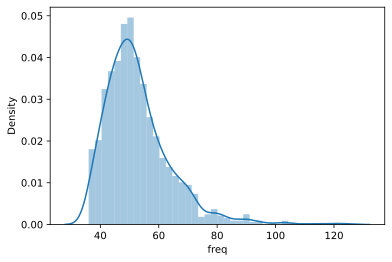

In [60]:
sns.distplot(all_qual['freq'])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='width', ylabel='Density'>

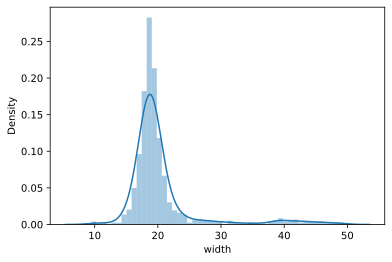

In [61]:
sns.distplot(all_qual['width'])

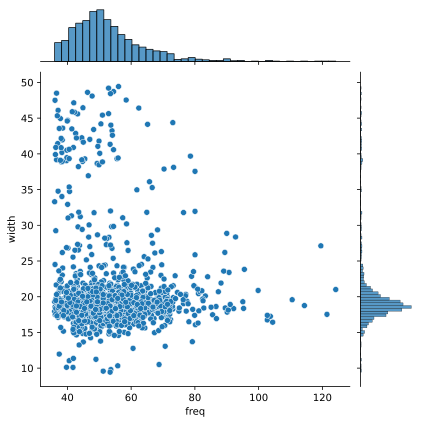

In [62]:
sns.jointplot(x='freq', y='width', data=all_qual, kind='scatter')

<AxesSubplot:xlabel='diagn', ylabel='freq'>

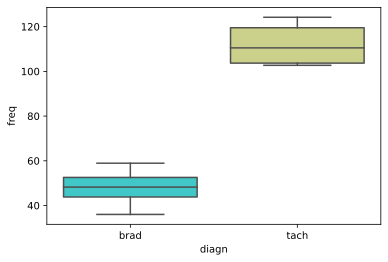

In [63]:
sns.boxplot(x="diagn", y="freq", data=all_qual, palette='rainbow')

<AxesSubplot:xlabel='diagn', ylabel='width'>

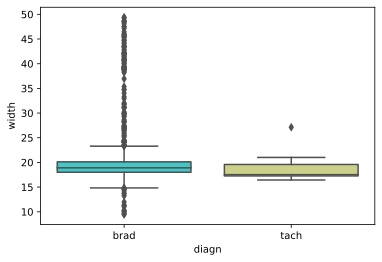

In [65]:
sns.boxplot(x="diagn", y="width", data=all_qual, palette='rainbow')

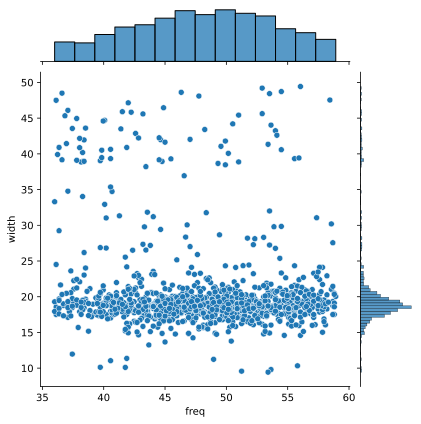

In [66]:
sns.jointplot(x='freq', y='width', data=all_qual[all_qual['diagn']=='brad'], kind='scatter')

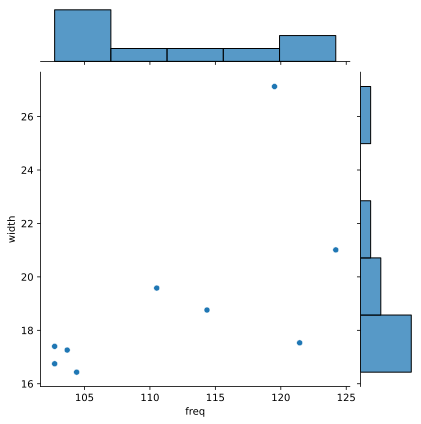

In [70]:
sns.jointplot(x='freq', y='width', data=all_qual[all_qual['diagn']=='tach'], kind='scatter')